In [1]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [2]:
#Read in the csv file and convert to a Pandas dataframe
df_CWU = pd.read_csv("..\data\cwr.csv")

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [3]:
df_CWU.head(20)

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1Top 0.1%,Harvard University\r\n CWUR Rating System: ...,USA,1,1,1,1,1,100.0
1,2Top 0.1%,Massachusetts Institute of Technology\r\n Edu...,USA,2,4,12,3,9,96.7
2,3Top 0.1%,Stanford University\r\n Education: A+; Employ...,USA,3,11,4,2,2,95.2
3,4Top 0.1%,University of Cambridge\r\n Education: A+; Em...,United Kingdom,1,3,25,5,11,94.1
4,5Top 0.1%,University of Oxford\r\n Education: A+; Emplo...,United Kingdom,2,7,27,9,4,93.3
5,6Top 0.1%,Princeton University\r\n Education: A+; Emplo...,USA,4,5,16,6,82,92.6
6,7Top 0.1%,University of Chicago\r\n Education: A+; Empl...,USA,5,8,15,22,28,92.1
7,8Top 0.1%,Columbia University\r\n Education: A+; Employ...,USA,6,12,14,10,13,91.6
8,9Top 0.1%,University of Pennsylvania\r\n Education: A; ...,USA,7,14,8,45,12,91.2
9,10Top 0.1%,Yale University\r\n Education: A+; Employabil...,USA,8,6,35,13,21,90.8


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [4]:
df_CWU.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   World Rank          2000 non-null   object 
 1   University Names    2000 non-null   object 
 2   Location            2000 non-null   object 
 3   National Rank       2000 non-null   int64  
 4   Educational Rank    2000 non-null   object 
 5   Employability Rank  2000 non-null   object 
 6   Faculty Rank        2000 non-null   object 
 7   Research Rank       2000 non-null   object 
 8   Score               2000 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 140.8+ KB


In [5]:
df_CWU.shape

(2000, 9)

In [6]:
df_CWU.describe()

,National Rank,Score
count,2000.000000,2000.00000
mean,69.245000,71.75555
std,85.538608,5.03880
min,1.000000,66.00000
25%,9.750000,67.90000
50%,33.000000,70.40000
75%,89.000000,74.30000
max,332.000000,100.00000


In [7]:
df_CWU.columns

Index(['World Rank', 'University Names', 'Location ', 'National Rank',
       'Educational Rank', 'Employability Rank', 'Faculty Rank',
       'Research Rank', 'Score'],
      dtype='object')

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [ ]:
# All columns will be taken into account for the problem statment solution, so no columns will be deleted.

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [8]:
# It's great we don't have duplicate rows
df_CWU.duplicated().sum()

0

In [9]:
# Check more
df_CWU[df_CWU.duplicated()]

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score


#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [10]:
#Display number missing values per column
df_CWU.isnull().sum().sort_values(ascending = False)

World Rank            0
University Names      0
Location              0
National Rank         0
Educational Rank      0
Employability Rank    0
Faculty Rank          0
Research Rank         0
Score                 0
dtype: int64

In [11]:
# But there are many values ​​​​that have been replaced by (-), as shown in the table
df_CWU

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1Top 0.1%,Harvard University\r\n CWUR Rating System: ...,USA,1,1,1,1,1,100.0
1,2Top 0.1%,Massachusetts Institute of Technology\r\n Edu...,USA,2,4,12,3,9,96.7
2,3Top 0.1%,Stanford University\r\n Education: A+; Employ...,USA,3,11,4,2,2,95.2
3,4Top 0.1%,University of Cambridge\r\n Education: A+; Em...,United Kingdom,1,3,25,5,11,94.1
4,5Top 0.1%,University of Oxford\r\n Education: A+; Emplo...,United Kingdom,2,7,27,9,4,93.3
...,...,...,...,...,...,...,...,...,...
1995,1996Top 9.8%,Chongqing Jiaotong University,China,314,-,-,-,1917,66.0
1996,1997Top 9.8%,University of Arkansas at Little Rock,USA,332,-,1322,-,1920,66.0
1997,1998Top 9.8%,Van Yüzüncü Yıl University,Turkey,54,-,-,-,1919,66.0
1998,1999Top 9.8%,Bharathidasan University,India,64,-,-,-,1922,66.0


 A way has been discovered to compensate for the missing values ​​by taking advantage of the score. 
 The method of calculation was researched and this equation was written, it was discovered that we will lose
 the some value. Therefore, we will compensate for the missing  values ​​with 999 to 
 symbolize that they have no rank .

https://cwur.org/methodology/world-university-rankings.php

In [30]:

'''
df_CWU['Educational Rank'] = (df_CWU['Score']  ) * .25 
df_CWU['Employability Rank'] = (df_CWU['Score']) * .25
df_CWU['Faculty Rank'] = (df_CWU['Score'] ) * .10
df_CWU['Research Rank'] = (df_CWU['Score'] ) * .40


# Round the rank values to two decimal places
df_CWU['Educational Rank'] = df_CWU['Educational Rank'].round(2)
df_CWU['Employability Rank'] = df_CWU['Employability Rank'].round(2)
df_CWU['Faculty Rank'] = df_CWU['Faculty Rank'].round(2)
df_CWU['Research Rank'] = df_CWU['Research Rank'].round(2)

'''

In [32]:
# df_CWU

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1,Harvard University\r\n CWUR Rating System: ...,USA,1,25.00,25.00,10.00,40.00,100.0
1,2,Massachusetts Institute of Technology\r\n Edu...,USA,2,24.18,24.18,9.67,38.68,96.7
2,3,Stanford University\r\n Education: A+; Employ...,USA,3,23.80,23.80,9.52,38.08,95.2
3,4,University of Cambridge\r\n Education: A+; Em...,United Kingdom,1,23.52,23.52,9.41,37.64,94.1
4,5,University of Oxford\r\n Education: A+; Emplo...,United Kingdom,2,23.32,23.32,9.33,37.32,93.3
...,...,...,...,...,...,...,...,...,...
1995,1996,Chongqing Jiaotong University,China,314,16.50,16.50,6.60,26.40,66.0
1996,1997,University of Arkansas at Little Rock,USA,332,16.50,16.50,6.60,26.40,66.0
1997,1998,Van Yüzüncü Yıl University,Turkey,54,16.50,16.50,6.60,26.40,66.0
1998,1999,Bharathidasan University,India,64,16.50,16.50,6.60,26.40,66.0


#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [12]:
# check columns types
df_CWU.dtypes 

World Rank             object
University Names       object
Location               object
National Rank           int64
Educational Rank       object
Employability Rank     object
Faculty Rank           object
Research Rank          object
Score                 float64
dtype: object

In [15]:
# go to clean them
# Do not forget, in the beginning, you must deal with missing Value to convert it to 999, 
# and this was done in the Data Cleaning so running it first.
df_CWU['Educational Rank'] = df_CWU['Educational Rank'].astype(int)
df_CWU['Employability Rank'] = df_CWU['Employability Rank'].astype(int)
df_CWU['Faculty Rank'] = df_CWU['Faculty Rank'].astype(int)
df_CWU['Research Rank'] = df_CWU['Research Rank'].astype(int)

In [16]:
df_CWU.dtypes

World Rank             object
University Names       object
Location               object
National Rank           int64
Educational Rank        int32
Employability Rank      int32
Faculty Rank            int32
Research Rank           int32
Score                 float64
dtype: object

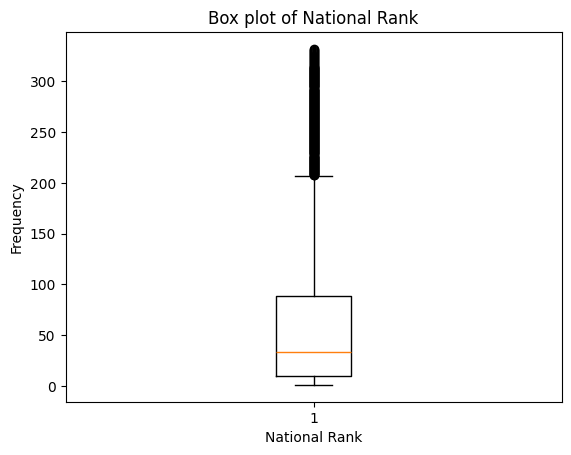

In [67]:
# check outliers 
plt.boxplot(df_CWU['National Rank'])
plt.xlabel('National Rank')
plt.ylabel('Frequency')
plt.title(f'Box plot of National Rank')
plt.show()

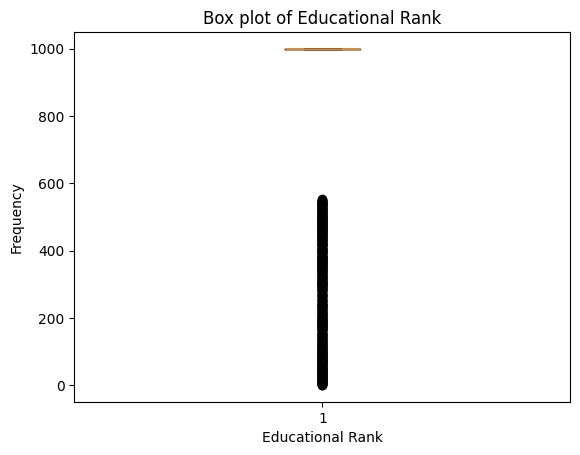

In [68]:
plt.boxplot(df_CWU['Educational Rank'])
plt.xlabel('Educational Rank')
plt.ylabel('Frequency')
plt.title(f'Box plot of Educational Rank')
plt.show()

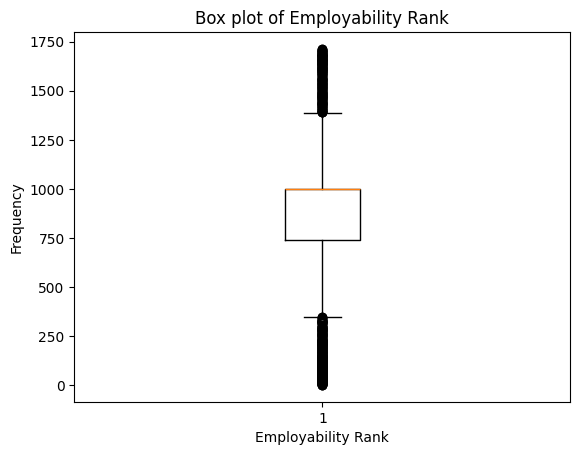

In [69]:
plt.boxplot(df_CWU['Employability Rank'])
plt.xlabel('Employability Rank')
plt.ylabel('Frequency')
plt.title(f'Box plot of Employability Rank')
plt.show()

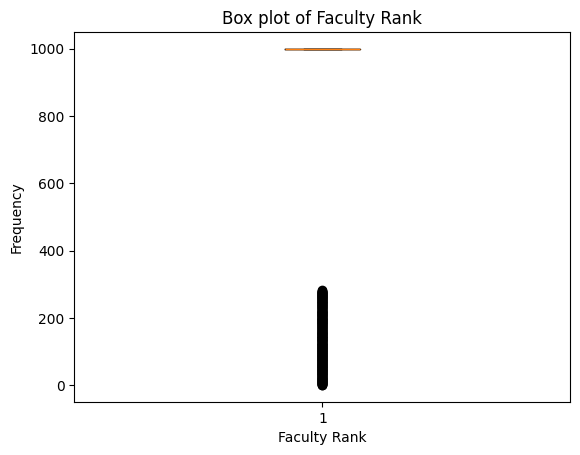

In [70]:
plt.boxplot(df_CWU['Faculty Rank'])
plt.xlabel('Faculty Rank')
plt.ylabel('Frequency')
plt.title(f'Box plot of Faculty Rank')
plt.show()

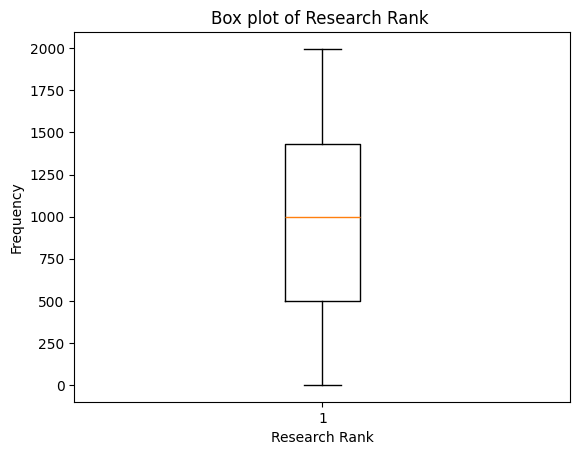

In [72]:
plt.boxplot(df_CWU['Research Rank'])
plt.xlabel('Research Rank')
plt.ylabel('Frequency')
plt.title(f'Box plot of Research Rank ')
plt.show()

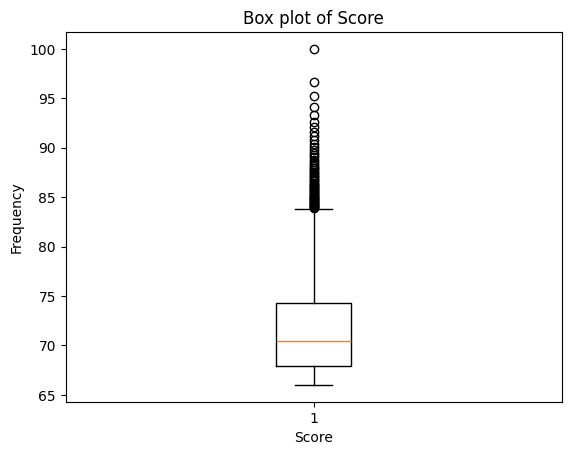

In [73]:
plt.boxplot(df_CWU['Score'])
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title(f'Box plot of Score')
plt.show()

**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [23]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [24]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [25]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


In [13]:
# Replace missing values with 999 in specified columns
columns_to_replace = ['Educational Rank', 'Employability Rank', 'Faculty Rank', 'Research Rank']
df_CWU[columns_to_replace] = df_CWU[columns_to_replace].replace('-', 999)

In [14]:
df_CWU

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1Top 0.1%,Harvard University\r\n CWUR Rating System: ...,USA,1,1,1,1,1,100.0
1,2Top 0.1%,Massachusetts Institute of Technology\r\n Edu...,USA,2,4,12,3,9,96.7
2,3Top 0.1%,Stanford University\r\n Education: A+; Employ...,USA,3,11,4,2,2,95.2
3,4Top 0.1%,University of Cambridge\r\n Education: A+; Em...,United Kingdom,1,3,25,5,11,94.1
4,5Top 0.1%,University of Oxford\r\n Education: A+; Emplo...,United Kingdom,2,7,27,9,4,93.3
...,...,...,...,...,...,...,...,...,...
1995,1996Top 9.8%,Chongqing Jiaotong University,China,314,999,999,999,1917,66.0
1996,1997Top 9.8%,University of Arkansas at Little Rock,USA,332,999,1322,999,1920,66.0
1997,1998Top 9.8%,Van Yüzüncü Yıl University,Turkey,54,999,999,999,1919,66.0
1998,1999Top 9.8%,Bharathidasan University,India,64,999,999,999,1922,66.0


In [55]:
# go back to 6th dimention --> Completeness


### Correcting errors

-------------------

In [17]:
# Here I will adjust the format of University Names	
df_CWU.head(11)

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1Top 0.1%,Harvard University\r\n CWUR Rating System: ...,USA,1,1,1,1,1,100.0
1,2Top 0.1%,Massachusetts Institute of Technology\r\n Edu...,USA,2,4,12,3,9,96.7
2,3Top 0.1%,Stanford University\r\n Education: A+; Employ...,USA,3,11,4,2,2,95.2
3,4Top 0.1%,University of Cambridge\r\n Education: A+; Em...,United Kingdom,1,3,25,5,11,94.1
4,5Top 0.1%,University of Oxford\r\n Education: A+; Emplo...,United Kingdom,2,7,27,9,4,93.3
5,6Top 0.1%,Princeton University\r\n Education: A+; Emplo...,USA,4,5,16,6,82,92.6
6,7Top 0.1%,University of Chicago\r\n Education: A+; Empl...,USA,5,8,15,22,28,92.1
7,8Top 0.1%,Columbia University\r\n Education: A+; Employ...,USA,6,12,14,10,13,91.6
8,9Top 0.1%,University of Pennsylvania\r\n Education: A; ...,USA,7,14,8,45,12,91.2
9,10Top 0.1%,Yale University\r\n Education: A+; Employabil...,USA,8,6,35,13,21,90.8


In [18]:
df_CWU['University Names'] = df_CWU['University Names'].str.split('\r').str[0]

In [19]:
df_CWU.head(11)

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1Top 0.1%,Harvard University,USA,1,1,1,1,1,100.0
1,2Top 0.1%,Massachusetts Institute of Technology,USA,2,4,12,3,9,96.7
2,3Top 0.1%,Stanford University,USA,3,11,4,2,2,95.2
3,4Top 0.1%,University of Cambridge,United Kingdom,1,3,25,5,11,94.1
4,5Top 0.1%,University of Oxford,United Kingdom,2,7,27,9,4,93.3
5,6Top 0.1%,Princeton University,USA,4,5,16,6,82,92.6
6,7Top 0.1%,University of Chicago,USA,5,8,15,22,28,92.1
7,8Top 0.1%,Columbia University,USA,6,12,14,10,13,91.6
8,9Top 0.1%,University of Pennsylvania,USA,7,14,8,45,12,91.2
9,10Top 0.1%,Yale University,USA,8,6,35,13,21,90.8


In [ ]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

In [20]:
df_CWU.head(2)

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1Top 0.1%,Harvard University,USA,1,1,1,1,1,100.0
1,2Top 0.1%,Massachusetts Institute of Technology,USA,2,4,12,3,9,96.7


#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

In [ ]:
# In our data, we do not have any Categorical Variables

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

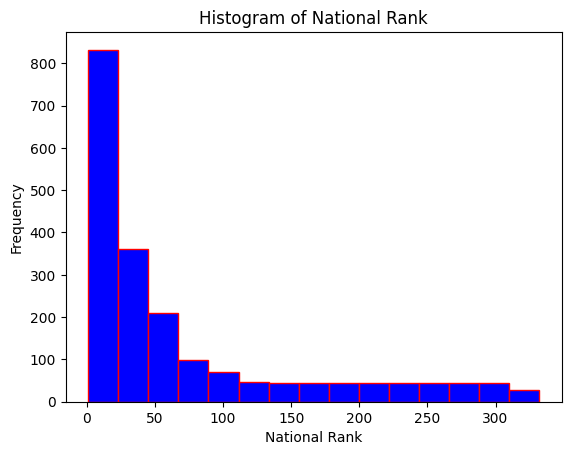

In [24]:
plt.hist(df_CWU['National Rank'],facecolor = 'b', edgecolor = 'red', bins = 15) 
plt.xlabel('National Rank')
plt.ylabel('Frequency')
plt.title(f'Histogram of National Rank')
plt.show()

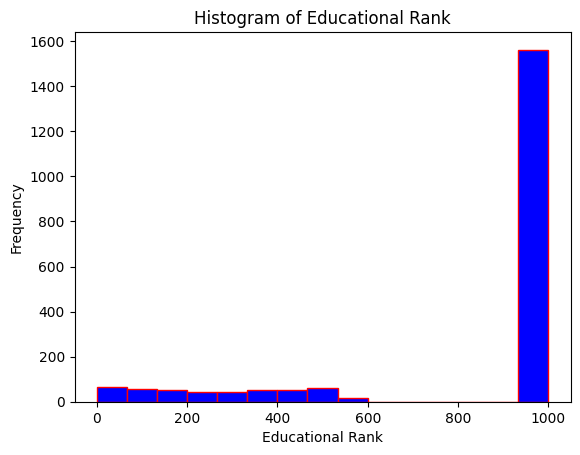

In [25]:
plt.hist(df_CWU['Educational Rank'],facecolor = 'b', edgecolor = 'red', bins = 15) 
plt.xlabel('Educational Rank')
plt.ylabel('Frequency')
plt.title(f'Histogram of Educational Rank')
plt.show()

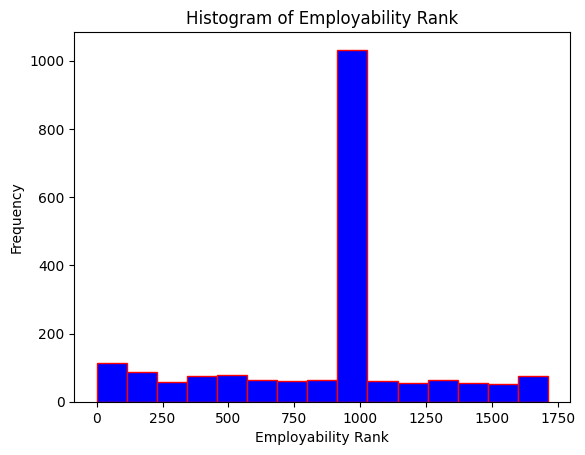

In [26]:
plt.hist(df_CWU['Employability Rank'],facecolor = 'b', edgecolor = 'red', bins = 15) 
plt.xlabel('Employability Rank')
plt.ylabel('Frequency')
plt.title(f'Histogram of Employability Rank')
plt.show()

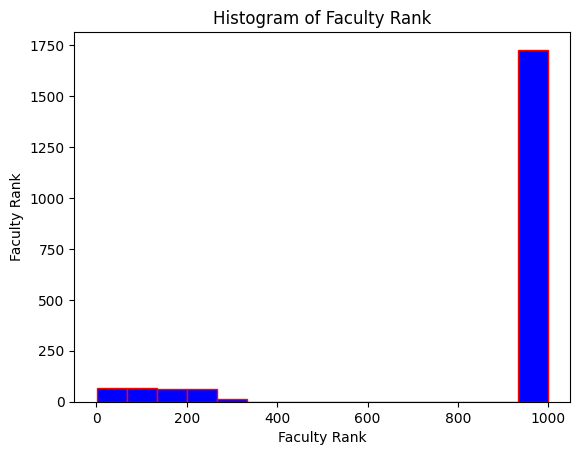

In [27]:
plt.hist(df_CWU['Faculty Rank'],facecolor = 'b', edgecolor = 'red', bins = 15) 
plt.xlabel('Faculty Rank')
plt.ylabel('Faculty Rank')
plt.title(f'Histogram of Faculty Rank')
plt.show()

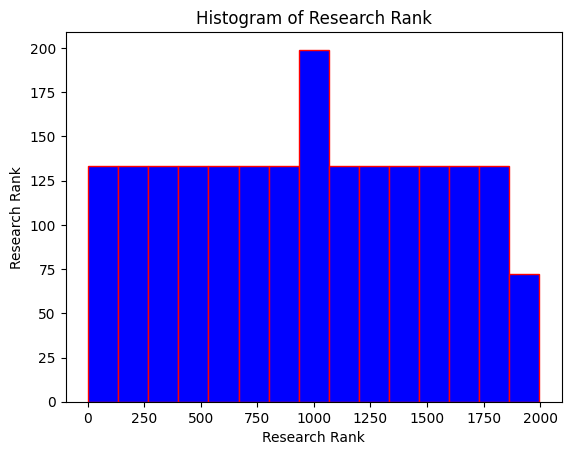

In [29]:
plt.hist(df_CWU['Research Rank'],facecolor = 'b', edgecolor = 'red', bins = 15) 
plt.xlabel('Research Rank')
plt.ylabel('Research Rank')
plt.title(f'Histogram of Research Rank')
plt.show()

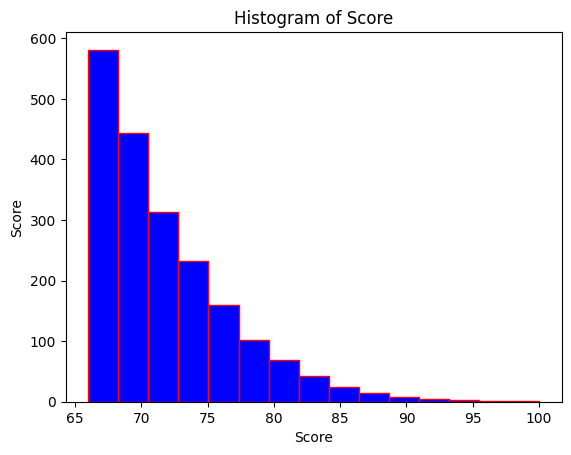

In [30]:
plt.hist(df_CWU['Score'],facecolor = 'b', edgecolor = 'red', bins = 15) 
plt.xlabel('Score')
plt.ylabel('Score')
plt.title(f'Histogram of Score')
plt.show()

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

In [31]:
df_CWU.describe().T

,count,mean,std,min,25%,50%,75%,max
National Rank,2000.0,69.24500,85.538608,1.0,9.75,33.0,89.00,332.0
Educational Rank,2000.0,840.26150,309.852409,1.0,999.00,999.0,999.00,999.0
Employability Rank,2000.0,890.19250,383.937476,1.0,738.50,999.0,999.00,1713.0
Faculty Rank,2000.0,881.60750,296.856565,1.0,999.00,999.0,999.00,999.0
Research Rank,2000.0,968.73700,549.528375,1.0,500.75,999.0,1434.25,1996.0
Score,2000.0,71.75555,5.038800,66.0,67.90,70.4,74.30,100.0


## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

**Categorical & numerical --> (scatter plot, histogram, box plot)**

**numerical & numerical --> (Scatter plot, line chart)**

We could also use a correlation matrix to get more specific information about the relationship between these two variables.

In [33]:
corr_matrix = df_CWU.select_dtypes(include=np.number).corr()
corr_matrix

,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
National Rank,1.000000,0.091722,0.031509,0.174347,0.338038,-0.335179
Educational Rank,0.091722,1.000000,0.391140,0.616350,0.446765,-0.586367
Employability Rank,0.031509,0.391140,1.000000,0.318559,0.307425,-0.434323
Faculty Rank,0.174347,0.616350,0.318559,1.000000,0.461031,-0.647792
Research Rank,0.338038,0.446765,0.307425,0.461031,1.000000,-0.895924
Score,-0.335179,-0.586367,-0.434323,-0.647792,-0.895924,1.000000


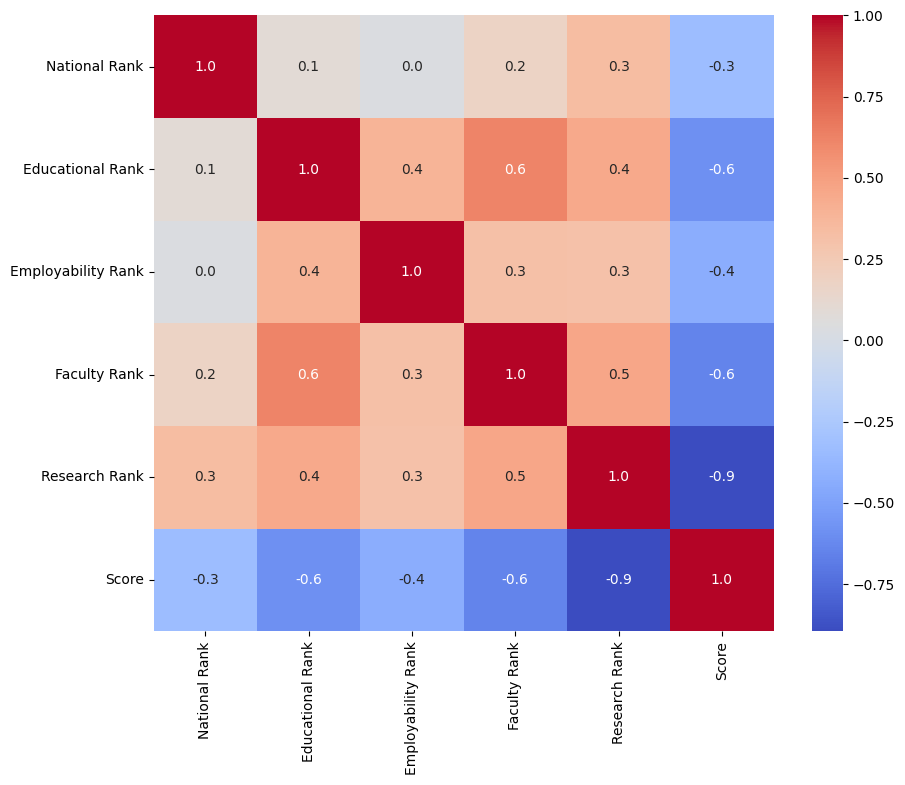

In [34]:
# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,
            annot=True, 
            cmap='coolwarm',
            fmt=".1f"
           )

# Show the plot
plt.show()